In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
import redis

cache_ip = '198.13.60.78'
cache_pw = 'da56038fa453c22d2c46e83179126e97d4d272d02ece83eb83a97357e842d065'

r = redis.StrictRedis(host=cache_ip, port=6379, password=cache_pw)

In [3]:
# redis keys
KOSPI_TICKERS = 'KOSPI_TICKERS'
KOSDAQ_TICKERS = 'KOSDAQ_TICKERS'

KOSPI_OHLCV = 'KOSPI_OHLCV'
KOSDAQ_OHLCV = 'KOSDAQ_OHLCV'
KOSPI_INDEX = 'I.001_INDEX'

KOSPI_VOL = 'KOSPI_VOL'
KOSDAQ_VOL = 'KOSDAQ_VOL'

kp_tickers = [ticker.decode() for ticker in r.lrange(KOSPI_TICKERS, 0 ,-1)]
kd_tickers = [ticker.decode() for ticker in r.lrange(KOSDAQ_TICKERS, 0 ,-1)]
tickers = kp_tickers + kd_tickers

In [4]:
# 포지션 관리
key = tickers[0] + '_OHLCV'
df = pd.read_msgpack(r.get(key))

full_key = tickers[0] + '_FULL_OHLCV'
full_df = pd.read_msgpack(r.get(full_key))

kp = pd.read_msgpack(r.get(KOSPI_INDEX))
kp = kp['cls_prc']
kp_ret = ((kp - kp.shift(1)) / kp.shift(1)).fillna(0)

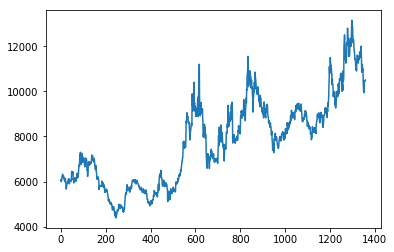

In [5]:
df['cls_prc'].plot()
plt.show()

In [7]:
p = df['cls_prc']

In [8]:
ret = p.pct_change()

In [ ]:
def realize_profit(curr_price, prev_price, , stock_num, capital):
    prev_portfolio = prev_price * stock_num
    curr_portfolio = curr_price * stock_num
    
    profit = curr_portfolio - prev_portfolio
    capital += profit

In [48]:
capital = 1000000
portfolio = 0
stock_num = 0

capital_history = [capital]

for index in range(len(p)):
    
    print(index)
    print('투자 시뮬레이션 시작. 가격: {}'.format(p[index]))
    
    # capital 기록이 2건 이상일 때 반마틴게일 투자방식 시작
    if len(capital_history) < 2:
        buy_amt = capital // p[index]
    else:
        # 수익을 얻었다면, 배팅 금액 고정
        # 손실이 났다면 배팅 금액 50%로 줄이기
        buy_amt = capital // p[index] if capital_history[-1] >= capital_history[-2] else (capital * 0.5) // p[index]
        
    print('매수량: {}'.format(int(buy_amt)))
    
    stock_num = stock_num + buy_amt # buy_amt만큼 주식을 구매
    portfolio = buy_amt * p[index] # 포트폴리오의 가치는 buy_amt * price
    capital = capital - portfolio # 투자 가능한 금액은 포트폴리오의 가치를 초기 자본금에서 뺀 것
    
    if stock_num != 0:
        print('포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.')

        profit = stock_num * p[index]
        capital = capital + profit

        capital_history.append(capital)

        # 포트폴리오 초기화
        portfolio = 0
        stock_num = 0
    
    print('포트폴리오가 비어있습니다. 투자합니다.')

0
투자 시뮬레이션 시작. 가격: 6090
포트폴리오가 비어있습니다. 투자합니다.
매수량: 164
1
투자 시뮬레이션 시작. 가격: 6000
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
2
투자 시뮬레이션 시작. 가격: 6020
포트폴리오가 비어있습니다. 투자합니다.
매수량: 81
3
투자 시뮬레이션 시작. 가격: 6020
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
4
투자 시뮬레이션 시작. 가격: 6110
포트폴리오가 비어있습니다. 투자합니다.
매수량: 161
5
투자 시뮬레이션 시작. 가격: 6200
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
6
투자 시뮬레이션 시작. 가격: 6200
포트폴리오가 비어있습니다. 투자합니다.
매수량: 161
7
투자 시뮬레이션 시작. 가격: 6330
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
8
투자 시뮬레이션 시작. 가격: 6280
포트폴리오가 비어있습니다. 투자합니다.
매수량: 162
9
투자 시뮬레이션 시작. 가격: 6250
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
10
투자 시뮬레이션 시작. 가격: 6220
포트폴리오가 비어있습니다. 투자합니다.
매수량: 81
11
투자 시뮬레이션 시작. 가격: 6240
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
12
투자 시뮬레이션 시작. 가격: 6250
포트폴리오가 비어있습니다. 투자합니다.
매수량: 162
13
투자 시뮬레이션 시작. 가격: 6120
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
14
투자 시뮬레이션 시작. 가격: 6150
포트폴리오가 비어있습니다. 투자합니다.
매수량: 81
15
투자 시뮬레이션 시작. 가격: 6150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
16
투자 시뮬레이션 시작. 가격: 6100
포트폴리오가 비어있습니다. 투자합니다.
매수량: 163
17
투자 시뮬레이션 시작. 가격: 6000
포트폴리

393
투자 시뮬레이션 시작. 가격: 5040
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
394
투자 시뮬레이션 시작. 가격: 5000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 105
395
투자 시뮬레이션 시작. 가격: 5000
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
396
투자 시뮬레이션 시작. 가격: 4920
포트폴리오가 비어있습니다. 투자합니다.
매수량: 213
397
투자 시뮬레이션 시작. 가격: 5060
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
398
투자 시뮬레이션 시작. 가격: 5100
포트폴리오가 비어있습니다. 투자합니다.
매수량: 212
399
투자 시뮬레이션 시작. 가격: 5110
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
400
투자 시뮬레이션 시작. 가격: 5110
포트폴리오가 비어있습니다. 투자합니다.
매수량: 212
401
투자 시뮬레이션 시작. 가격: 5150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
402
투자 시뮬레이션 시작. 가격: 5150
포트폴리오가 비어있습니다. 투자합니다.
매수량: 212
403
투자 시뮬레이션 시작. 가격: 5120
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
404
투자 시뮬레이션 시작. 가격: 5000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 108
405
투자 시뮬레이션 시작. 가격: 5050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
406
투자 시뮬레이션 시작. 가격: 5040
포트폴리오가 비어있습니다. 투자합니다.
매수량: 216
407
투자 시뮬레이션 시작. 가격: 5170
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
408
투자 시뮬레이션 시작. 가격: 5170
포트폴리오가 비어있습니다. 투자합니다.
매수량: 216
409
투자 시뮬레이션 시작. 가격: 5190
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매

매수량: 189
679
투자 시뮬레이션 시작. 가격: 7130
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
680
투자 시뮬레이션 시작. 가격: 7240
포트폴리오가 비어있습니다. 투자합니다.
매수량: 186
681
투자 시뮬레이션 시작. 가격: 7150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
682
투자 시뮬레이션 시작. 가격: 6990
포트폴리오가 비어있습니다. 투자합니다.
매수량: 95
683
투자 시뮬레이션 시작. 가격: 6890
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
684
투자 시뮬레이션 시작. 가격: 6890
포트폴리오가 비어있습니다. 투자합니다.
매수량: 96
685
투자 시뮬레이션 시작. 가격: 6850
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
686
투자 시뮬레이션 시작. 가격: 6900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 95
687
투자 시뮬레이션 시작. 가격: 6960
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
688
투자 시뮬레이션 시작. 가격: 6940
포트폴리오가 비어있습니다. 투자합니다.
매수량: 191
689
투자 시뮬레이션 시작. 가격: 7020
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
690
투자 시뮬레이션 시작. 가격: 6900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 194
691
투자 시뮬레이션 시작. 가격: 6900
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
692
투자 시뮬레이션 시작. 가격: 6980
포트폴리오가 비어있습니다. 투자합니다.
매수량: 192
693
투자 시뮬레이션 시작. 가격: 7000
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
694
투자 시뮬레이션 시작. 가격: 6990
포트폴리오가 비어있습니다. 투자합니다.
매수량: 192
695
투자 시뮬레이션 시작. 가격: 7020
포트폴리오에 투자한 주식이 있습니다. 모든 

투자 시뮬레이션 시작. 가격: 7720
포트폴리오가 비어있습니다. 투자합니다.
매수량: 72
965
투자 시뮬레이션 시작. 가격: 7680
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
966
투자 시뮬레이션 시작. 가격: 7610
포트폴리오가 비어있습니다. 투자합니다.
매수량: 72
967
투자 시뮬레이션 시작. 가격: 7560
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
968
투자 시뮬레이션 시작. 가격: 7590
포트폴리오가 비어있습니다. 투자합니다.
매수량: 72
969
투자 시뮬레이션 시작. 가격: 7470
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
970
투자 시뮬레이션 시작. 가격: 7480
포트폴리오가 비어있습니다. 투자합니다.
매수량: 73
971
투자 시뮬레이션 시작. 가격: 7540
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
972
투자 시뮬레이션 시작. 가격: 7740
포트폴리오가 비어있습니다. 투자합니다.
매수량: 142
973
투자 시뮬레이션 시작. 가격: 7820
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
974
투자 시뮬레이션 시작. 가격: 7900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 141
975
투자 시뮬레이션 시작. 가격: 7940
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
976
투자 시뮬레이션 시작. 가격: 8000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 139
977
투자 시뮬레이션 시작. 가격: 7980
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
978
투자 시뮬레이션 시작. 가격: 7920
포트폴리오가 비어있습니다. 투자합니다.
매수량: 70
979
투자 시뮬레이션 시작. 가격: 7900
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
980
투자 시뮬레이션 시작. 가격: 7800
포트폴리오가 비어있습니다. 투자합니다.
매수량: 71
981
투자 시뮬

1250
투자 시뮬레이션 시작. 가격: 10800
포트폴리오가 비어있습니다. 투자합니다.
매수량: 94
1251
투자 시뮬레이션 시작. 가격: 10450
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1252
투자 시뮬레이션 시작. 가격: 10300
포트폴리오가 비어있습니다. 투자합니다.
매수량: 47
1253
투자 시뮬레이션 시작. 가격: 10050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1254
투자 시뮬레이션 시작. 가격: 10000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 48
1255
투자 시뮬레이션 시작. 가격: 10050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1256
투자 시뮬레이션 시작. 가격: 10250
포트폴리오가 비어있습니다. 투자합니다.
매수량: 95
1257
투자 시뮬레이션 시작. 가격: 10050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1258
투자 시뮬레이션 시작. 가격: 10900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 43
1259
투자 시뮬레이션 시작. 가격: 10450
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1260
투자 시뮬레이션 시작. 가격: 10500
포트폴리오가 비어있습니다. 투자합니다.
매수량: 44
1261
투자 시뮬레이션 시작. 가격: 10650
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1262
투자 시뮬레이션 시작. 가격: 12050
포트폴리오가 비어있습니다. 투자합니다.
매수량: 78
1263
투자 시뮬레이션 시작. 가격: 12150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1264
투자 시뮬레이션 시작. 가격: 12500
포트폴리오가 비어있습니다. 투자합니다.
매수량: 76
1265
투자 시뮬레이션 시작. 가격: 12500
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1266
투자 시뮬레이션 시작. 가격: 12100
포트폴리

In [9]:
def kellys_criterion(rt, kp_ret, window):
    # 배팅 비중 계산 (Kelly Criterion 사용)
    ret_list = []

    rolling_rt = rt.rolling(window).mean()
    rolling_kp_ret = kp_ret.rolling(window).mean()

    for i in range(len(rt)):
        if i == 0:
            stock_return = rt[i]
            kospi_return = kp_ret[i]
        else:
            stock_return = rt[:i].mean() if i < window else rolling_rt[i]
            kospi_return = kp_ret[:i].mean() if i < window else rolling_kp_ret[i]
        excess_return = stock_return - kospi_return
        ret_list.append(excess_return)

    kelly = pd.DataFrame(ret_list)
    kelly.rename(columns={0: 'Excess Return'}, inplace=True)
    kelly['Excess Return MA'] = kelly['Excess Return'].rolling(window).mean() # moving average
    kelly['Excess Return MV'] = kelly['Excess Return'].rolling(window).var() # moving variance

    kelly_criterion = []

    for i in range(len(kelly)):
        if i == 0:
            exc_ret_mean = kelly['Excess Return'][i].mean()
            exc_ret_var = kelly['Excess Return'][i].var()
        else:
            exc_ret_mean = kelly['Excess Return'][:i].mean() if i < window else kelly['Excess Return MA'][i]
            exc_ret_var = kelly['Excess Return'][:i].var() if i < window else kelly['Excess Return MV'][i]
        kelly_ratio = exc_ret_mean / exc_ret_var
        kelly_criterion.append(kelly_ratio)

    kelly['Kelly Criterion'] = kelly_criterion
    kelly['Kelly Criterion MAX'] = kelly['Kelly Criterion'].rolling(window).max()
    kelly['Kelly Criterion MIN'] = kelly['Kelly Criterion'].rolling(window).min()

    invest_ratio = []

    for i in range(len(kelly['Kelly Criterion'])):
        if i == 0:
            invest_amt = 1
        if i < window:
            kelly_nums = kelly['Kelly Criterion'][:i]
            max_kelly = kelly_nums.max()
            min_kelly = kelly_nums.min()
            invest_amt = (kelly['Kelly Criterion'][i] - min_kelly) / (max_kelly - min_kelly) if max_kelly - min_kelly != 0 else 1
        if i >= window:
            max_kelly = kelly['Kelly Criterion MAX'][i]
            min_kelly = kelly['Kelly Criterion MIN'][i]
            invest_amt = (kelly['Kelly Criterion'][i] - min_kelly) / (max_kelly - min_kelly) if max_kelly - min_kelly != 0 else 1
        if pd.isnull(kelly['Kelly Criterion'][i]):
            invest_amt = 1
        invest_ratio.append(invest_amt)

    invest_ratio = [ratio if (ratio <= 1) and (ratio >= 0) else 1 for ratio in invest_ratio]

    kelly['Invest Ratio'] = invest_ratio
    kelly['Invest Ratio'].fillna(1, inplace=True)
    
    return kelly['Invest Ratio']

def backtest_rms(kelly=False, anti_martingale=False, trend=False, trend_sht_window=20, trend_long_window=60):
    # 고려할 팩터 새팅
    kelly_factor = kelly
    anti_martingale_factor = anti_martingale
    trend_factor = trend
    short_term_trend_window = trend_sht_window
    long_term_trend_window = trend_long_window
    test_portion_list = [0.05, 0.1, 0.5, 1]

    # fee = 0.00015 # 0.015%
    # tax = 0.003 # 0.3%
    fee = 0
    tax = 0
    total_fee_per_trade = (2 * fee) + tax

    backtest_df = pd.DataFrame()
    system_stop_backtest_df = pd.DataFrame()

    p_1 = p.shift(1).fillna(p[0])
    rt = (p - p_1)/p_1

    m_short = p.rolling(short_term_trend_window).mean()
    m_long = p.rolling(long_term_trend_window).mean()

    trend = m_short > m_long

    kelly_invest_amt = kellys_criterion(rt, kp_ret, long_term_trend_window)

    for portion in test_portion_list:
        profit = 1
        profit_history = []
        profit_history_with_system_stop = []

        invest_portion = 1

        resize = False # 투자 금액을 줄일지 말지

        for rat in range(len(rt)):
            ret_pct = rt[rat] - total_fee_per_trade # 수수료, 세금 제외

            ### Kelly's Criterion Implementation ###
            kelly_invest_portion = kelly_invest_amt[rat] if kelly_invest_amt[rat] != 0 else portion
            invest_portion = invest_portion if kelly_factor == False else kelly_invest_portion

            profit = profit * ((ret_pct * invest_portion) + 1)
            profit_history.append(profit)
            
#             ### System Stop Implementation ###
#             profit_df = pd.DataFrame(profit_history).pct_change()
#             profit_short = profit_df.rolling(short_term_trend_window).mean()
#             profit_long = profit_df.rolling(long_term_trend_window).mean()
#             system_stop = profit_short < profit_long
#             try:
#                 stop = system_stop.iloc[-2]
#                 system_stop_profit = profit if stop != True else profit_history_with_system_stop[-1] / ((ret_pct * invest_portion) + 1)
#             except:
#                 system_stop_profit = profit
            
#             profit_history_with_system_stop.append(system_stop_profit)

            # 당일 수익이 +이면, 투자 비중을 조절하지 않는다
            # 수익이 -이면 비중 조절을 한다
            if kelly_factor:
                resize = True
            if anti_martingale_factor:
                resize = False if ret_pct >= 0 else True
            if trend_factor:
                resize = False if trend[rat] == True else True

            invest_portion = portion if resize else 1

        backtest_df[str(portion)] = profit_history
#         system_stop_backtest_df[str(portion)] = profit_history_with_system_stop

    print(backtest_df.iloc[-1] - backtest_df.iloc[0])
    backtest_df.plot()
    
    return backtest_df

/Users/abc/.virtualenvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


0.05    0.724138
0.1     0.724138
0.5     0.724138
1       0.724138
dtype: float64
0.05    0.898305
0.1     0.897135
0.5     0.854455
1       0.724138
dtype: float64
0.05    1.298016
0.1     1.233501
0.5     0.755074
1       0.255769
dtype: float64


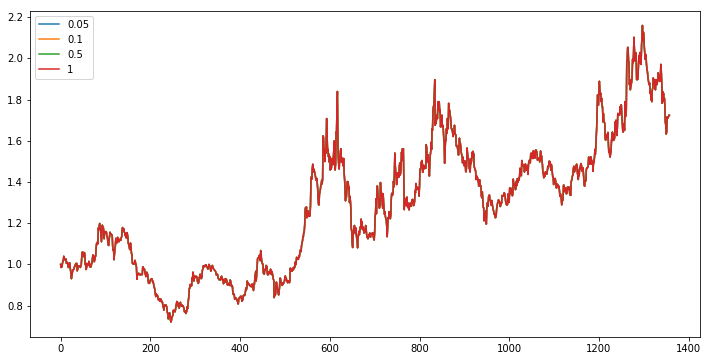

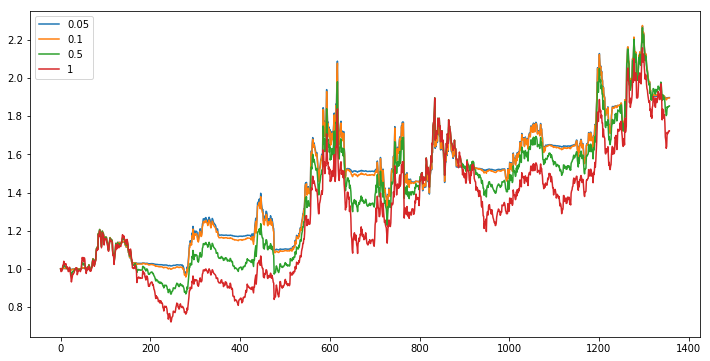

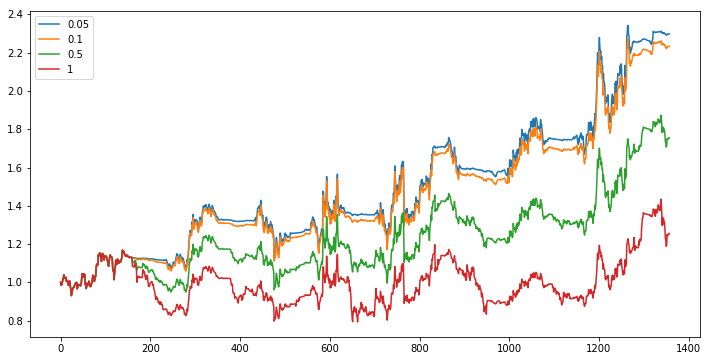

In [10]:
no_algo = backtest_rms(kelly=False, anti_martingale=False, trend=False)
martingale_trend = backtest_rms(kelly=False, anti_martingale=True, trend=True)
kelly_trend = backtest_rms(kelly=True, anti_martingale=True, trend=True)

In [11]:
backtest_results = pd.concat([no_algo, martingale_trend, kelly_trend], axis=1)

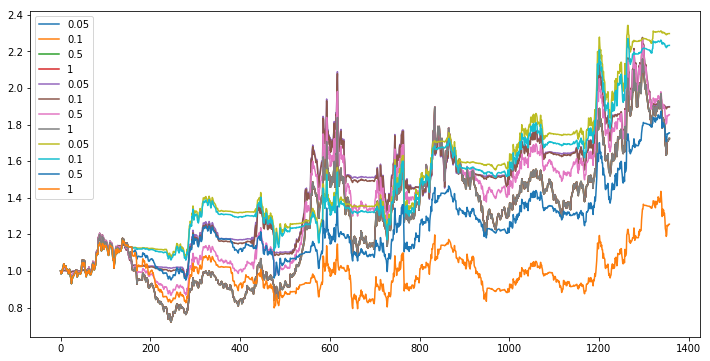

In [12]:
backtest_results.plot()
plt.show()

In [52]:
def kelly_criterion(rt, kp_ret, window):
    '''
    rt: 종목의 종가로 계산한 리턴값
    kp_ret: 코스피 지수로 계산한 리턴값
    window: rolling시킬 일수 (보통 60 사용)
    '''
    # 배팅 비중 계산 (Kelly Criterion 사용)
    
    # STEP 1: excess return 계산하기
    # 종목 평균 수익률 - 코스피 평균 수익률 (rolling으로 처리하여 계산)
    ret_list = []

    rolling_rt = rt.rolling(window).mean()
    rolling_kp_ret = kp_ret.rolling(window).mean()

    for i in range(len(rt)):
        if i == 0:
            stock_return = rt[i] # nan
            kospi_return = kp_ret[i] # nan
        else:
            stock_return = rt[:i].mean() if i < window else rolling_rt[i]
            kospi_return = kp_ret[:i].mean() if i < window else rolling_kp_ret[i]
        excess_return = stock_return - kospi_return
        ret_list.append(excess_return)

    kelly = pd.DataFrame(ret_list)
    kelly.rename(columns={0: 'Excess Return'}, inplace=True)
    kelly['Excess Return MA'] = kelly['Excess Return'].rolling(window).mean() # excess return의 moving average
    kelly['Excess Return MV'] = kelly['Excess Return'].rolling(window).var() # excess return의 moving variance

    kelly_criterion = []

    for i in range(len(kelly)):
        if i == 0:
            exc_ret_mean = kelly['Excess Return'][i].mean()
            exc_ret_var = kelly['Excess Return'][i].var()
        else:
            exc_ret_mean = kelly['Excess Return'][:i].mean() if i < window else kelly['Excess Return MA'][i]
            exc_ret_var = kelly['Excess Return'][:i].var() if i < window else kelly['Excess Return MV'][i]
        kelly_ratio = exc_ret_mean / exc_ret_var
        kelly_criterion.append(kelly_ratio)

    kelly['Kelly Criterion'] = kelly_criterion
    # 캘리 숫자를 0 ~ 1로 스케일링하기 위해 max, min 구하기
    kelly['Kelly Criterion MAX'] = kelly['Kelly Criterion'].rolling(window).max()
    kelly['Kelly Criterion MIN'] = kelly['Kelly Criterion'].rolling(window).min()

    invest_ratio = []

    for i in range(len(kelly['Kelly Criterion'])):
        
        if i == 0:
            # 시작은 자본금 전체 투자한다
            invest_amt = 1
            
        if i < window:
            # window보다 작은 인덱스값은 위에서 계산한 max, min이 없기 때문에 따로 rolling으로 데이터를 묶어서 max, min을 계산
            kelly_nums = kelly['Kelly Criterion'][:i] # 0 부터 현재값까지 모두 묶기
            max_kelly = kelly_nums.max()
            min_kelly = kelly_nums.min()
            invest_amt = (kelly['Kelly Criterion'][i] - min_kelly) / (max_kelly - min_kelly) if max_kelly - min_kelly != 0 else 1
            
        if i >= window:
            max_kelly = kelly['Kelly Criterion MAX'][i]
            min_kelly = kelly['Kelly Criterion MIN'][i]
            invest_amt = (kelly['Kelly Criterion'][i] - min_kelly) / (max_kelly - min_kelly) if max_kelly - min_kelly != 0 else 1
            
        if pd.isnull(kelly['Kelly Criterion'][i]):
            # 캘리 숫자가 없으면 자본금 모두를 투자 (보통 초기 몇개 빼고는 모두 캘리 숫자가 있다)
            invest_amt = 1
            
        invest_ratio.append(invest_amt)

    # 초기 몇개의 데이터는 음수인 숫자도 있고 1이 훨씬 넘는 숫자도 있다
    # 모두 제거한다
    invest_ratio = [ratio if (ratio <= 1) and (ratio >= 0) else 1 for ratio in invest_ratio]

    kelly['Invest Ratio'] = invest_ratio
    kelly['Invest Ratio'].fillna(1, inplace=True)
    
    return pd.DataFrame(kelly['Invest Ratio'])

In [28]:
p_1 = p.shift(1).fillna(p[0])
rt = (p - p_1)/p_1
kelly = kelly_criterion(rt, kp_ret, 60)

/Users/abc/.virtualenvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


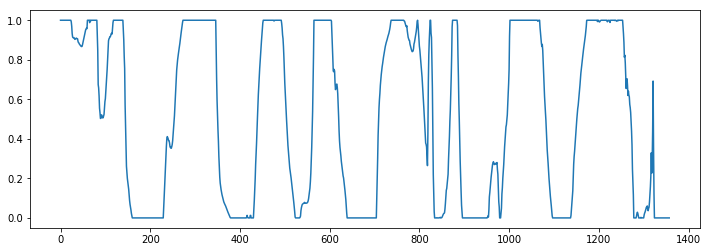

In [30]:
kelly.plot()

In [59]:
def atr(full_df):
    tr = pd.DataFrame()
    tr['H-L'] = full_df['high_prc'] - full_df['low_prc']
    tr['H-P_1'] = (full_df['high_prc'] - full_df.shift(1)['cls_prc']).apply(lambda x: abs(x))
    tr['L-P_1'] = (full_df['low_prc'] - full_df.shift(1)['cls_prc']).apply(lambda x: abs(x))
    tr = tr.max(axis=1)

    atr_list = []
    for i in range(len(tr)):
        if i < 14:
            atr = sum(tr[:i]) / (i + 1)
        else:
            atr = ((atr_list[-1] * 13) + tr[i]) / 14
        atr_list.append(atr)

    atr = pd.DataFrame(atr_list)
    atr.rename(columns={0: 'ATR'}, inplace=True)
    
    return atr

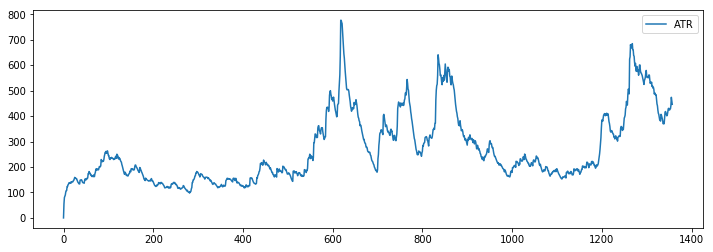

In [21]:
atr = atr(full_df)

In [65]:
def buy(capital, invest_ratio, buy_price, stock_num, portfolio_value):
    # 1: 살 수 있는 주식의 수를 계산한다
    stock_buy_num = (capital * invest_ratio) // buy_price
    # 2: 총 보유중인 주식수를 계산한다
    stock_num = stock_num + stock_buy_num
    # 3: 주식을 사는데 드는 비용을 계산한다
    cost = stock_buy_num * buy_price
    # 4: 보유중인 자본금과 포트폴리오의 가치를 계산한다
    capital = capital - cost
    portfolio_value = portfolio_value + cost
    return capital, stock_num, portfolio_value

def sell(capital, sell_price, stock_num, portfolio_value):
    # 1: 수익금액을 계산한다
    profit = stock_num * sell_price
    # 2: 자본금을 다시 계산한다
    capital = capital + profit
    # 3: 보유 주식수와 포트폴리오 가치를 0으로 새팅한다
    stock_num = 0
    portfolio_value = 0
    return capital, stock_num, portfolio_value

In [134]:
import numpy as np

def backtest(kelly_factor, stop_loss_factor, stop_loss_multiplier, profit_loss_ratio, title):
    ## Event Driven Backtesting ##
#     kelly_factor = True
#     stop_loss_factor = True

    capital = 100000000
    fee = 0.00015
    tax = 0.003
#     stop_loss_multiplier = 1
    stop_loss_price = 0
#     profit_loss_ratio = 1.5
    portfolio_value = 0
    stock_num = 0
    capital_history = []

    buy_signal = p.rolling(20).mean() > p.rolling(60).mean()
    buy_signal = buy_signal.shift(1)
    buy_signal_price = buy_signal * p
    buy_signal_price.replace({0: np.nan}, inplace=True)
    buy_signal_price.rename(columns={0: 'Buy'}, inplace=True)
    
    buy_signal = [True] * len(p)

    p_1 = p.shift(1).fillna(p[0])
    rt = (p - p_1)/p_1
    kelly_df = kelly_criterion(rt, kp_ret, 60)

    atr_df= atr(full_df)

    for i in range(len(p)):

        stock_price = p[i]
        buy_price = (stock_price * (1 + fee))
        sell_price = (stock_price * (1 - fee - tax))

        if buy_signal[i] == False:

            # 매도
            if stock_num != 0:
                capital, stock_num, portfolio_value = sell(capital, sell_price, stock_num, portfolio_value)

        elif buy_signal[i] == True:

            # 매수
            if stock_num == 0:

                if kelly_factor == True:
                    invest_ratio = kelly_df['Invest Ratio'][i]
                    capital, stock_num, portfolio_value = buy(capital, invest_ratio, buy_price, stock_num, portfolio_value)
                elif kelly_factor == False:
                    capital, stock_num, portfolio_value = buy(capital, 1, buy_price, stock_num, portfolio_value)
                stop_profit_price = stock_price + ((profit_loss_ratio * stop_loss_multiplier) * atr_df['ATR'][i]) # 익절 라인 새로 잡기
                stop_loss_price = stock_price - (stop_loss_multiplier * atr_df['ATR'][i]) # 손절 라인 새로 잡기

            elif stock_num != 0:

                if stop_loss_factor == True:
                    # 손절
                    if stock_price <= stop_loss_price:
    #                     print('Stop LOSS: {} <= {}'.format(stock_price, stop_loss_price))
                        capital, stock_num, portfolio_value = sell(capital, sell_price, stock_num, portfolio_value)
                    # 익절
                    elif stock_price >= stop_profit_price:
    #                     print('Stop PROFIT: {} >= {}'.format(stock_price, stop_profit_price))
                        capital, stock_num, portfolio_value = sell(capital, sell_price, stock_num, portfolio_value)

        total_capital = capital + portfolio_value
        capital_history.append(total_capital)

    backtest_df = pd.DataFrame(capital_history)
    backtest_df['Return'] = backtest_df.pct_change().fillna(0)
    backtest_df['Benchmark'] = kp_ret
    backtest_df['Excess Return'] = backtest_df['Return'] - backtest_df['Benchmark']
    sharpe_ratio = backtest_df['Excess Return'].mean() / backtest_df['Excess Return'].std()

    # 결과 출력
    print(title)
    print('수익률: {}'.format((capital_history[-1] - capital_history[0]) / capital_history[0]))
    print('Sharpe Ratio: {}'.format(sharpe_ratio))

    plt.rcParams["figure.figsize"] = (12, 2)

#     p.plot()
#     buy_signal_price.plot()
#     plt.show()

#     kelly_df.plot()
#     plt.show()

#     atr_df.plot()
#     plt.show()

    plt.plot(capital_history)
    plt.show()

/Users/abc/.virtualenvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


단순 20-60 돌파 전략
수익률: 0.0
Sharpe Ratio: -0.01529558605126901


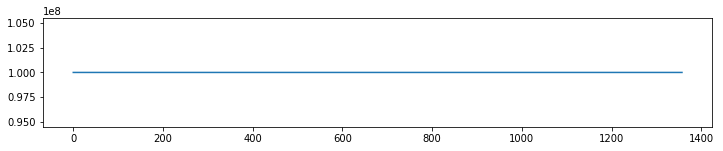

단순 20-60 돌파 + Kelly 전략
수익률: 0.0
Sharpe Ratio: -0.01529558605126901


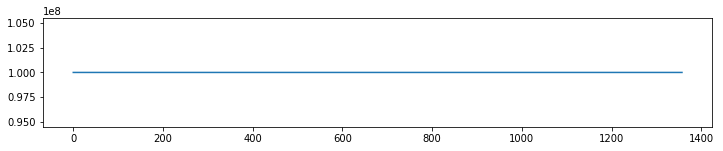

단순 20-60 돌파 + Stop-Loss 전략
수익률: 0.04255356471998557
Sharpe Ratio: 0.006853454106169087


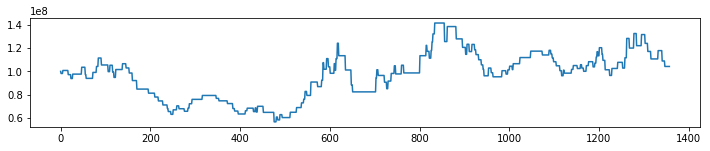

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.1, Profit Loss Ratio: 1.2) 전략
수익률: -0.7036618421950163
Sharpe Ratio: -0.07016043825380129


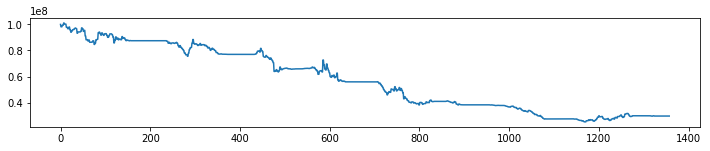

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.1, Profit Loss Ratio: 1.5) 전략
수익률: -0.6892777394075178
Sharpe Ratio: -0.07332999006855427


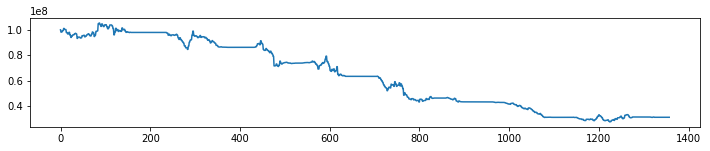

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.1, Profit Loss Ratio: 1.7) 전략
수익률: -0.6626466652275175
Sharpe Ratio: -0.06846561945563806


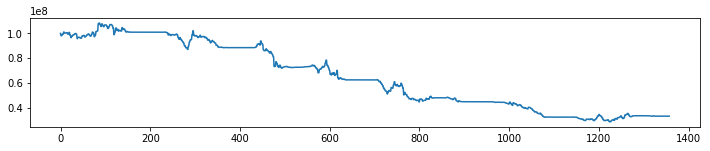

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.1, Profit Loss Ratio: 2) 전략
수익률: -0.6537998548175172
Sharpe Ratio: -0.06625181101617386


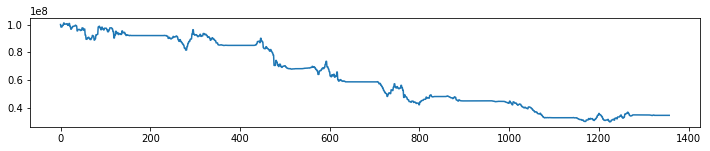

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.1, Profit Loss Ratio: 2.5) 전략
수익률: -0.617486778737515
Sharpe Ratio: -0.05936038864256338


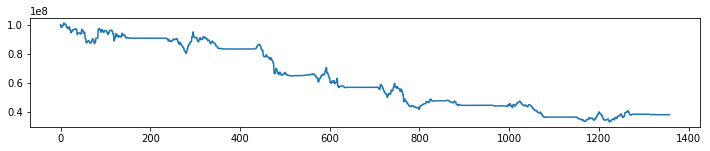

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.1, Profit Loss Ratio: 3) 전략
수익률: -0.6071483823875139
Sharpe Ratio: -0.05747841263437819


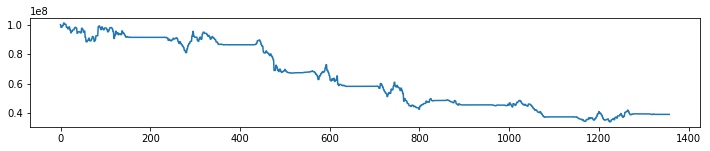

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.3, Profit Loss Ratio: 1.2) 전략
수익률: -0.5461945984300148
Sharpe Ratio: -0.046970421041732845


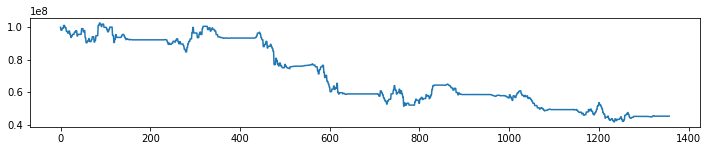

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.3, Profit Loss Ratio: 1.5) 전략
수익률: -0.4682076933000162
Sharpe Ratio: -0.03589283554105604


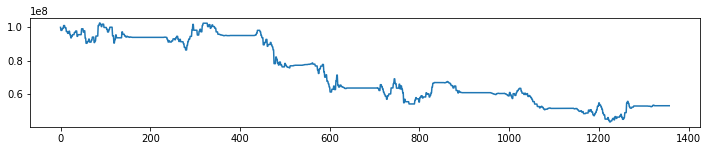

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.3, Profit Loss Ratio: 1.7) 전략
수익률: -0.2966915865425141
Sharpe Ratio: -0.019216279514332656


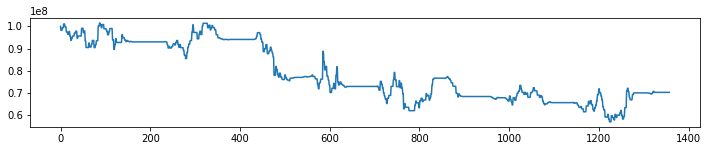

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.3, Profit Loss Ratio: 2) 전략
수익률: -0.3689824569200159
Sharpe Ratio: -0.024307891067583996


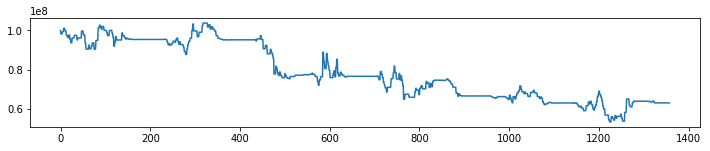

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.3, Profit Loss Ratio: 2.5) 전략
수익률: -0.11673423159251273
Sharpe Ratio: -0.007405444777838556


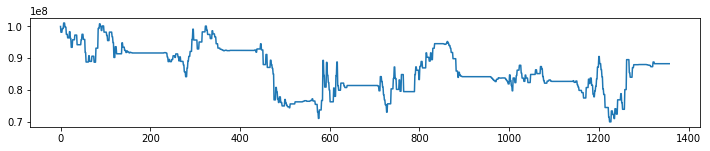

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.3, Profit Loss Ratio: 3) 전략
수익률: 0.07016706550998568
Sharpe Ratio: 0.002296006033215291


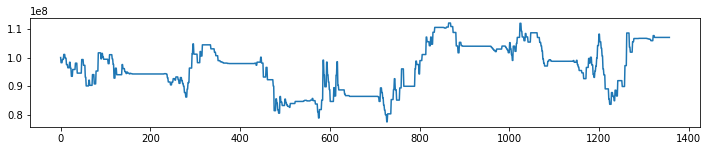

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.5, Profit Loss Ratio: 1.2) 전략
수익률: -0.15949377023001374
Sharpe Ratio: -0.00983262551117338


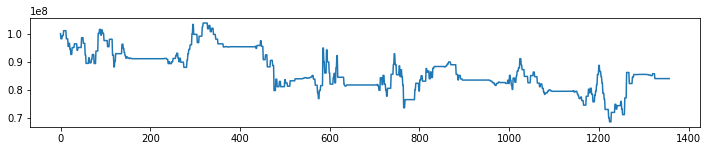

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.5, Profit Loss Ratio: 1.5) 전략
수익률: 0.03712860999498576
Sharpe Ratio: 0.0006458351482739849


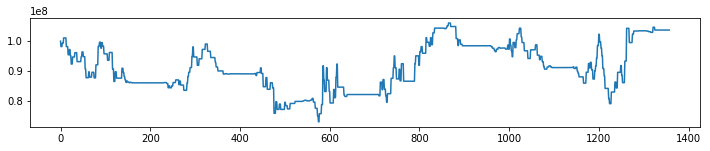

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.5, Profit Loss Ratio: 1.7) 전략
수익률: 0.30585481675748527
Sharpe Ratio: 0.01191711724443802


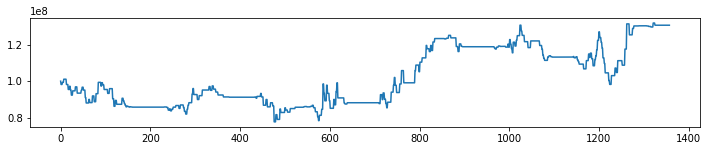

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.5, Profit Loss Ratio: 2) 전략
수익률: 0.451134027934989
Sharpe Ratio: 0.016894377791803118


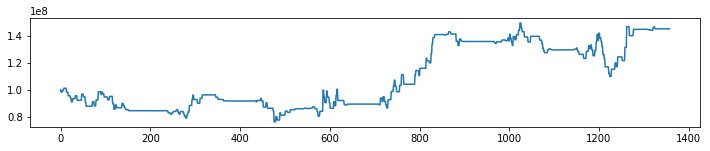

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.5, Profit Loss Ratio: 2.5) 전략
수익률: 0.610520270439988
Sharpe Ratio: 0.021679793587306803


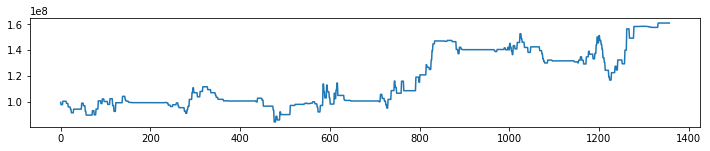

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.5, Profit Loss Ratio: 3) 전략
수익률: 1.049523777879985
Sharpe Ratio: 0.032355531872964666


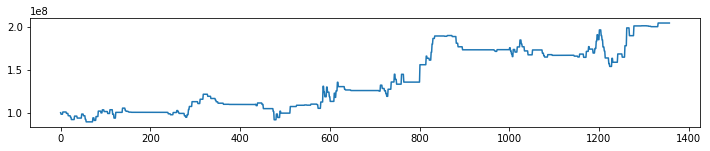

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.7, Profit Loss Ratio: 1.2) 전략
수익률: 0.44354682186998634
Sharpe Ratio: 0.016726705437726582


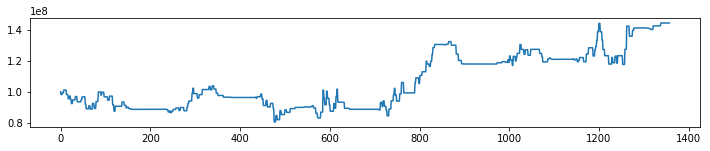

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.7, Profit Loss Ratio: 1.5) 전략
수익률: 0.5660293954949885
Sharpe Ratio: 0.020292259465174677


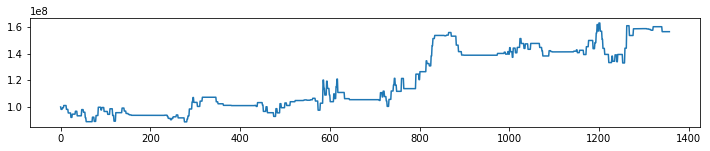

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.7, Profit Loss Ratio: 1.7) 전략
수익률: 0.7596241387274852
Sharpe Ratio: 0.02567296410559742


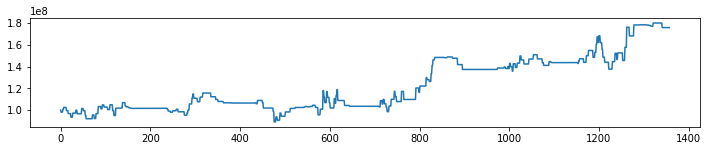

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.7, Profit Loss Ratio: 2) 전략
수익률: 0.9535965957199889
Sharpe Ratio: 0.030382237385151008


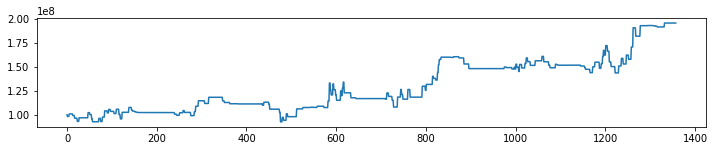

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.7, Profit Loss Ratio: 2.5) 전략
수익률: 0.9833523933274889
Sharpe Ratio: 0.029890658205744432


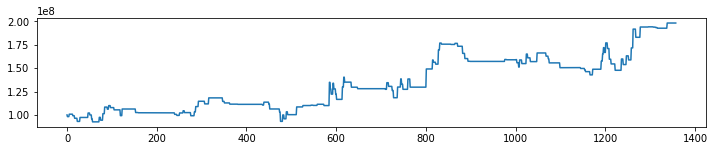

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 0.7, Profit Loss Ratio: 3) 전략
수익률: 0.9303203566674906
Sharpe Ratio: 0.02777378009962953


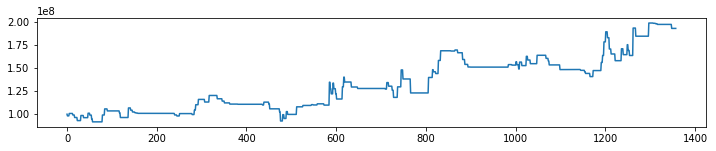

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1, Profit Loss Ratio: 1.2) 전략
수익률: 0.799581576469991
Sharpe Ratio: 0.026632824164956957


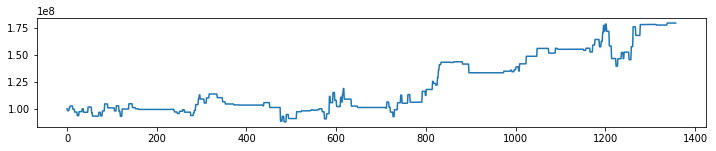

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1, Profit Loss Ratio: 1.5) 전략
수익률: 1.6518402217324901
Sharpe Ratio: 0.043657809559912567


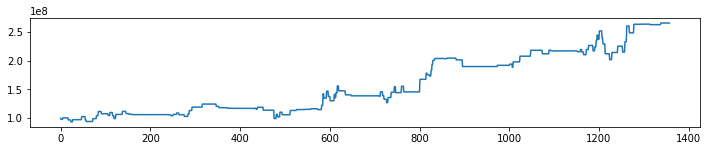

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1, Profit Loss Ratio: 1.7) 전략
수익률: 1.2320297605374897
Sharpe Ratio: 0.035276168245603944


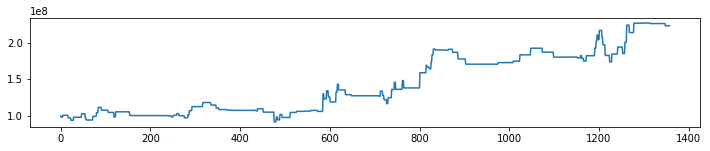

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1, Profit Loss Ratio: 2) 전략
수익률: 1.108640361764991
Sharpe Ratio: 0.03244773127184065


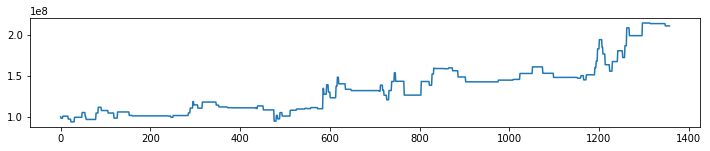

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1, Profit Loss Ratio: 2.5) 전략
수익률: 1.1559605470149923
Sharpe Ratio: 0.03178089628006149


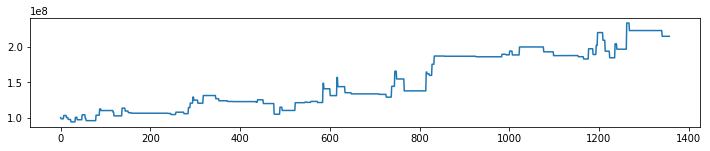

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1, Profit Loss Ratio: 3) 전략
수익률: 1.1023715845074946
Sharpe Ratio: 0.03064969330111086


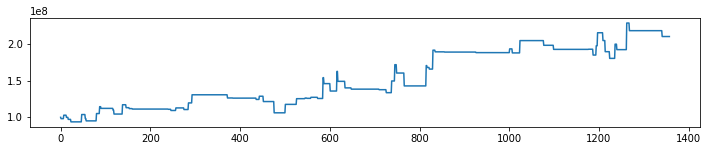

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.2, Profit Loss Ratio: 1.2) 전략
수익률: 0.9359258508224926
Sharpe Ratio: 0.02966026196391675


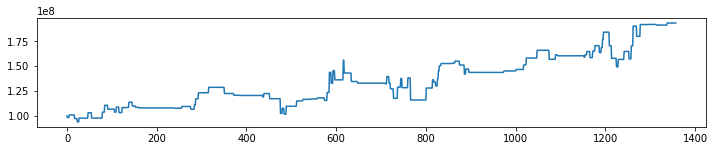

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.2, Profit Loss Ratio: 1.5) 전략
수익률: 1.669235779737491
Sharpe Ratio: 0.04228132815846165


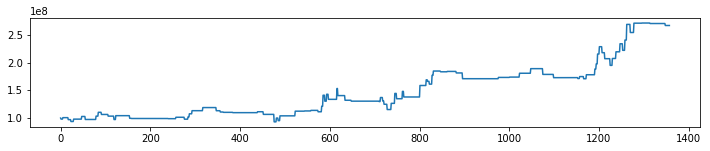

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.2, Profit Loss Ratio: 1.7) 전략
수익률: 1.3737538757874912
Sharpe Ratio: 0.036721217680935773


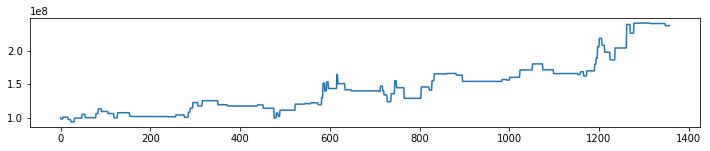

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.2, Profit Loss Ratio: 2) 전략
수익률: 1.0699599596474927
Sharpe Ratio: 0.029918664101126577


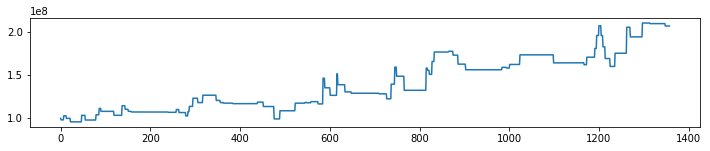

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.2, Profit Loss Ratio: 2.5) 전략
수익률: 0.928361006899994
Sharpe Ratio: 0.02713694320167733


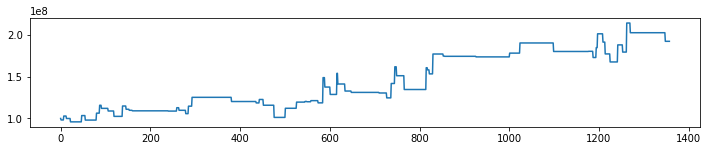

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.2, Profit Loss Ratio: 3) 전략
수익률: 1.0262676709149947
Sharpe Ratio: 0.028738338496711067


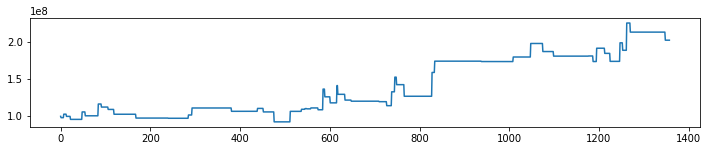

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.5, Profit Loss Ratio: 1.2) 전략
수익률: 0.7250901759549934
Sharpe Ratio: 0.023943790179850585


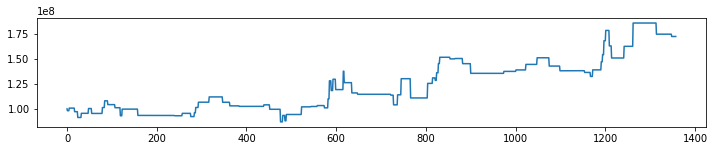

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.5, Profit Loss Ratio: 1.5) 전략
수익률: 1.0300212929599948
Sharpe Ratio: 0.030202267357380075


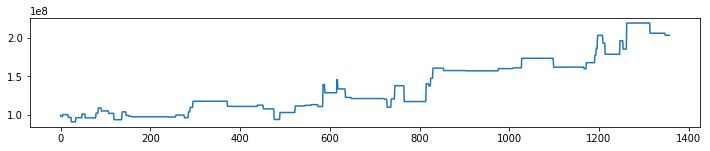

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.5, Profit Loss Ratio: 1.7) 전략
수익률: 1.230503869954994
Sharpe Ratio: 0.032985782749724364


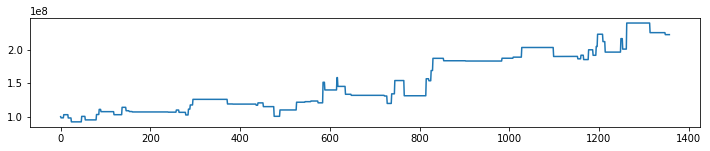

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.5, Profit Loss Ratio: 2) 전략
수익률: 1.0399314648299962
Sharpe Ratio: 0.02910096427580565


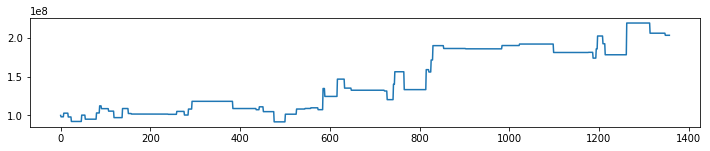

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.5, Profit Loss Ratio: 2.5) 전략
수익률: 0.7349673516949975
Sharpe Ratio: 0.022815229355425785


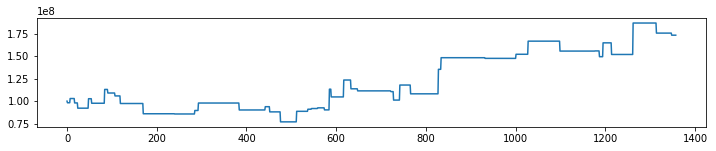

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.5, Profit Loss Ratio: 3) 전략
수익률: 0.2447025389974968
Sharpe Ratio: 0.010388050294554084


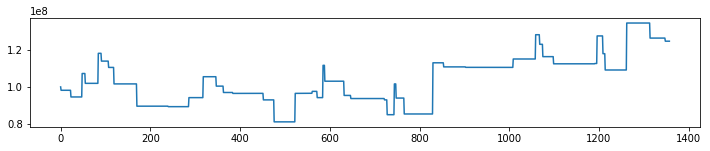

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.7, Profit Loss Ratio: 1.2) 전략
수익률: 0.9887772395024943
Sharpe Ratio: 0.02982632433812012


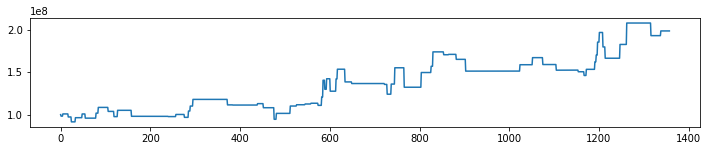

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.7, Profit Loss Ratio: 1.5) 전략
수익률: 1.207262854729995
Sharpe Ratio: 0.0336283565015148


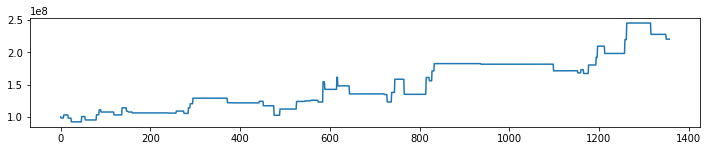

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.7, Profit Loss Ratio: 1.7) 전략
수익률: 0.7141101147799963
Sharpe Ratio: 0.02320540222010626


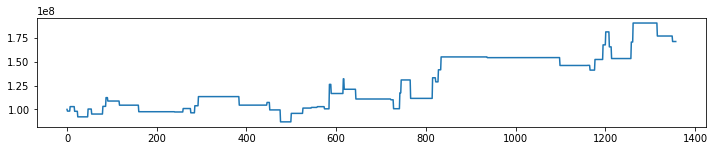

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.7, Profit Loss Ratio: 2) 전략
수익률: 0.623550853284997
Sharpe Ratio: 0.020373474970553716


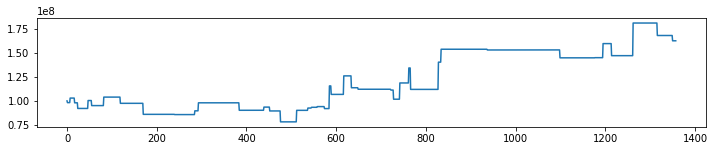

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.7, Profit Loss Ratio: 2.5) 전략
수익률: 0.11360882827999666
Sharpe Ratio: 0.006274669508709689


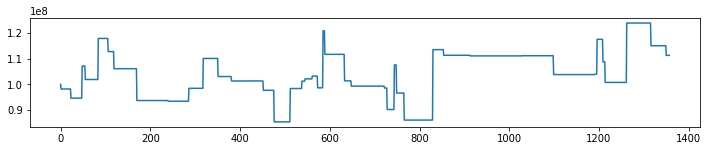

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 1.7, Profit Loss Ratio: 3) 전략
수익률: 0.06721883165499806
Sharpe Ratio: 0.004787987181742405


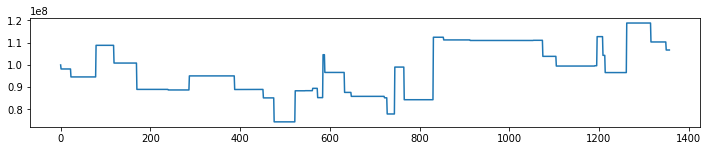

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 2, Profit Loss Ratio: 1.2) 전략
수익률: 0.9532447014449957
Sharpe Ratio: 0.028145921831112003


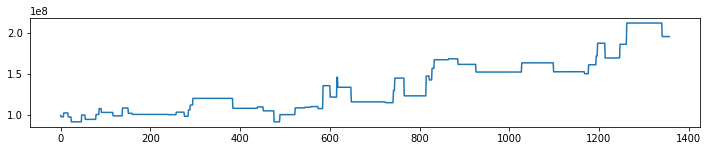

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 2, Profit Loss Ratio: 1.5) 전략
수익률: 0.562753322339997
Sharpe Ratio: 0.01939506350556487


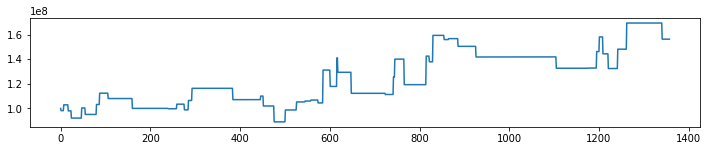

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 2, Profit Loss Ratio: 1.7) 전략
수익률: 0.3297057298799971
Sharpe Ratio: 0.01304841225622988


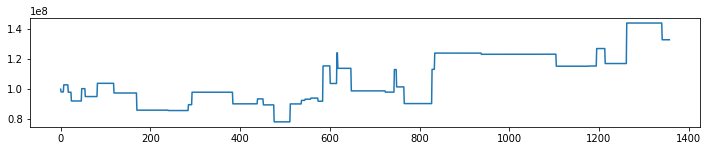

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 2, Profit Loss Ratio: 2) 전략
수익률: 0.4983334484299964
Sharpe Ratio: 0.01724708077655491


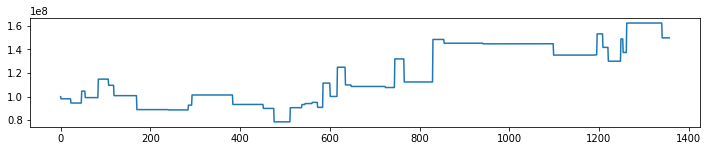

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 2, Profit Loss Ratio: 2.5) 전략
수익률: 0.2973387300949977
Sharpe Ratio: 0.012270170999987196


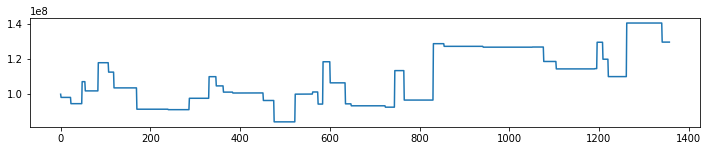

단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: 2, Profit Loss Ratio: 3) 전략
수익률: 0.18356530418249845
Sharpe Ratio: 0.008467288975831079


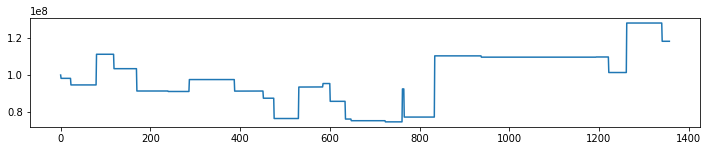

In [135]:
backtest(False, False, 0, 0, '단순 20-60 돌파 전략')
backtest(True, False, 0, 0, '단순 20-60 돌파 + Kelly 전략')
backtest(False, True, 1, 1.5, '단순 20-60 돌파 + Stop-Loss 전략')
# stop loss 비율 최적화
multiplier = [0.1, 0.3, 0.5, 0.7, 1, 1.2, 1.5, 1.7, 2]
ratio = [1.2, 1.5, 1.7, 2, 2.5, 3]
for m in multiplier:
    for r in ratio:
        backtest(True, True, m, r, '단순 20-60 돌파 + Kelly + Stop-Loss (Multiplier: {}, Profit Loss Ratio: {}) 전략'.format(m, r))